## 들어가며
**변화의 흐름 - Word Embedding과 Context**  
  
1. 시간이 늦었으니 커피 말고 차나 한 잔 마시자  
2. 제주도는 버스로 움직이기 힘들어. 차가 있어야 해.  
3.  축구공을 이쪽으로 차.  
  
워드 임베딩 방법들은, 주변 단어를 학습할 때만 고려하게 됩니다. 다른 모델의 입력으로써 사용할 때(학습된 벡터들을 이용하여 input 단어들을 벡터화시킬 때)는 동음이의어, 다의어와 같은 경우들을 모두 고정된 하나의 벡터로 표현하게 되면서 주변의 단어들을 고려하지 않게 되는 것이죠. 정작 학습할 때는 문맥을 열심히 보더니, 테스트할 때는 현재 단어 한 개만 보는 모양새가 되어버렸습니다.  
  
앞으로 등장하는 모델들은 이러한 문맥(context)을 잘 반영하는 모델들입니다.

## Transfer Learning과 Language Modeling
### Transfer Learning(전이 학습)
전이 학습은 특정 환경에서 학습을 마친 신경망(일부 혹은 전부)을 유사하거나 다른 환경에서 사용하는 것을 의미합니다. 쉽게 생각해 보면, 사과를 깎는 것을 배운 아이에게 배를 깎도록 다시 학습시키는 거죠. 이미 사과를 깎는 것을 배웠으니 비슷하게 생긴 배도 유사한 방법으로 쉽게 깎을 수 있을 것이라고 생각이 들죠?  
  
이처럼 전이 학습을 이용하게 되면 적은 데이터로도 성능을 곧잘 만들어 낼 수 있다는 이점이 있습니다.

### Language Modeling(언어 모델)
자연어 처리에서의 전이 학습은 보통 language model(언어 모델)과 관련이 깊습니다.  
  
언어 모델은 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 됩니다. 즉, 언어 모델은 철수가 밥을 마셨다인지 철수가 밥을 먹었다인지를 데이터로부터 학습을 하게 됩니다. 이렇게 학습을 완료한 언 어모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 익히게 됩니다.  
  
바로 이 언어 모델이 pretrained model이 되는 것입니다. 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이지요. 이처럼 주어진 문제(다운스트림 테스크 혹은 downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부릅니다.  

### Transformer
사실 최근 NLP의 가장 큰 흐름은 트랜스포머라고 해도 무방하다고 생각합니다. GPT, BERT 등 이후에 만들어지는 모델들은 트랜스포머가 기반이기 때문이죠.

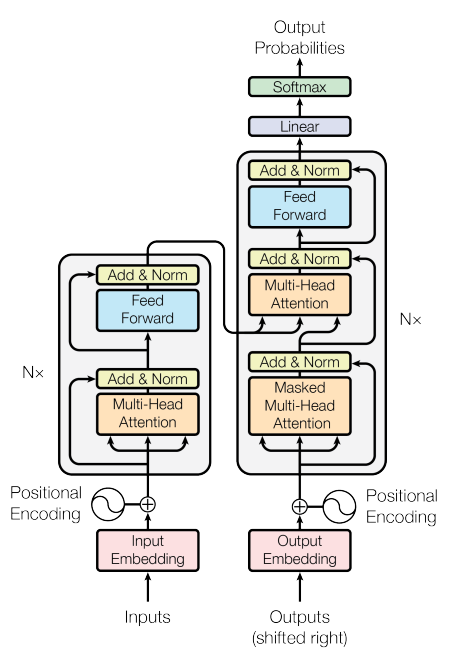

트랜스포머는 Encoder-Decoder 구조로, RNN이나 LSTM 등을 사용하지 않고 attention만을 이용한 모델입니다. 그래서 비록 LSTM 등 RNN 구조를 사용하지 않지만 번역기 모델 등에 사용하는 seq2seq 모델과 구조적으로는 동일합니다. Encoder-Decoder 모델이라면 입력부터 출력까지의 파이프라인이 이미 고정되어 있어서 이를 이용해 임베딩을 구하거나 전이 학습을 통해 다른 태스크에 활용하기 어려울 것 같습니다. 그렇다면 transformer 모델이 어떻게 modern NLP의 토대를 이루는 중요한 모델로 발전할 수 있었을까요?

## ELMO(Embedding from Language Models)
ELMo는 문맥(context)을 반영한 임베딩을 pretrained model로 구현한 첫 번째 사례입니다. 언어 모델을 이용하여 임베딩을 한 것입니다.  

### ELMo의 구조

ELMo는 세 가지 요소로 구성되어 있습니다. 첫 번째는 character-level CNN, 두 번째는 bidirectional LSTM, 마지막으로 ELMo 레이어가 있습니다. 각각 어떤 역할을 하고 있는지 하나씩 살펴보도록 하겠습니다.  
  
**1. character-level CNN**  
character-level CNN은 입력된 문자들 간의 관계를 파악하고 임베딩 벡터로 변환하는 역할을 합니다.  
  
ELMo는 character level로 문자를 인식합니다. 좀 더 구체적으로 말한다면, 해당 character의 유니코드 ID를 입력으로 받습니다. 예를 들어, 밥이라는 단어를 입력으로 받으면 ㅂㅏㅂ에 해당되는 유니코드 `235, 176, 165` 세 개의 숫자가 됩니다.  
  
이렇게 각각 입력받은 단어의 시작과 끝에 해당하는 스페셜 토큰 `<BOW>`와 `<EOW>`에 해당하는 유니코드를 앞뒤로 붙여줍니다. 이후 각 유니코드 아이디에 해당하는 행 벡터를 참조하여 붙입니다.(look-up table)  
  
만들어진 벡터에 (n x 임베딩 차원 수) 사이즈의 필터로 컨볼루션하여 피처맵을 만들고 max-pooling하여 하나의 값을 뽑아냅니다. 이러한 작업을 반복하여 사용자가 원하는 크기만큼의 벡터로 만들어냅니다.  
  
여기서 n은 한 번에 몇 개의 문자들을 함께 볼 것인가를 의미합니다. n이 2라면 `<BOW> ㅂ`, `ㅂ ㅏ`, `ㅏ ㅂ`, `ㅂ <EOW>` 이렇게 문자 2개씩 보면서 2개 사이의 관계를 파악하는 CNN이 됩니다.  
  
ELMo의 original 코드에서는 각기 다른 사이즈를 가진 7개의 필터를 이용하여 2048차원의 벡터를 만든다고 합니다.

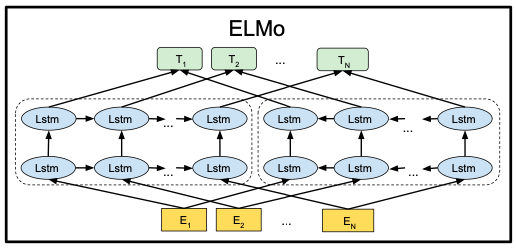

character-level CNN을 통과하여 만들어진 벡터 $(E_1, E_2, ... , E_N)$들은 bidirectional LSTM을 통과하게 됩니다.  
  
pretrain시에 bidirectional LSTM은 주어진 입력에 다음에 올 단어들을 예측합니다.(bidirectional LM이라고도 불리웁니다.)  
  
bidirectional이라는 것은 양방향으로 학습하는 것을 의미합니다. 주어진 입력을 한 번은 순방향으로, 한 번은 역방향으로 각각 2개의 LSTM layer를 통과하게 됩니다. 이렇게 양방향으로 학습하는 것은 모델의 사이즈와 학습에 걸리는 시간이 늘어날 수는 있지만 그만큼 성능이 좋답니다.  
  
pretrain 시, 순방향과 역방향으로 LSTM을 통과한 히든 벡터들은 이후 softmax(소프트 맥스)를 취해 다음 단어를 예측하게 됩니다. 이때 ELMo는 순방향과 역방향의 벡터를 합치거나 더하지 않습니다. 각각의 독립적인 모델처럼 행동하게 되는데요. 이는 조금만 생각해 보면 이유를 알 수 있습니다. 하나는 순방향으로, 하나는 역방향으로 진행하다 보니 cheating(다른 방향의 모델에게 정답을 가르쳐 줌)의 가능성이 있기 때문이죠.  
  
이렇게 ELMo는 단어를 하나씩 하나씩 슬라이딩하여 다음 단어를 예측하면서 문장 내의 단어와 단어들 사이의 관계를 학습하게 됩니다.

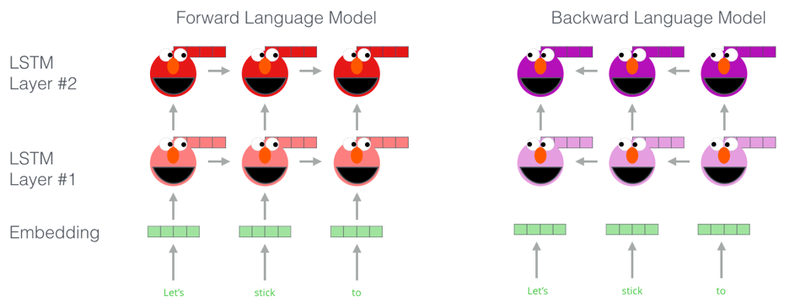

### ELMO 임베딩 레이어
ELMo 임베딩은 pretrain이 끝나고 finetuning을 하는 과정에서 만들어집니다.  
  
`stick`이란 단어의 임베딩을 구한다고 가정해 봅시다.

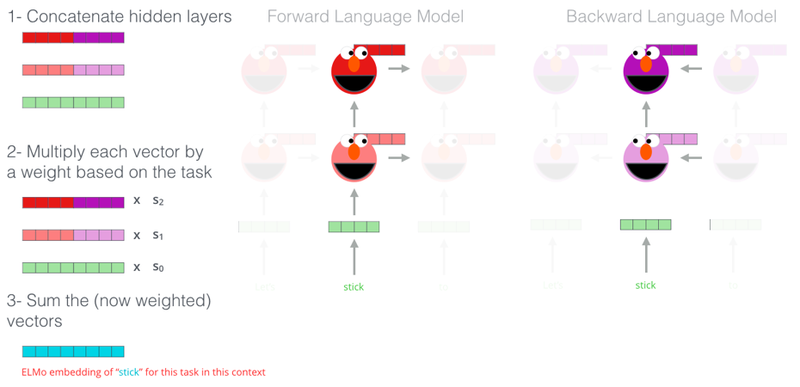

우선 구하려고 하는 토큰에 대한 각 층의 출력값을 모두 가지고 옵니다. 여기서의 각 층의 출력값이라고 하면, 임베딩 벡터(character-level CNN을 통과한 후 나오는 벡터), 각각의 LSTM layer에서의 hidden vector를 의미합니다.  
  
그 다음 각 층 $1, 2, ... , l, ...$마다 가중치 $s_1, s_2, ... , s_l, ...$를 곱해서 모두 더해줍니다.(weighted sum 혹은 가중합을 해준다고 말할 수 있습니다.)  
  
마지막으로 다운스트림 태스크의 가중치 γ를 곱하면 ELMo의 임베딩이 됩니다.  
  
여기서 가중치 $s_i$와 γ는 다운스트림 태스크 별로 finetuning시 학습되는 값들입니다.  
  
복잡해 보이지만, 구하고자 하는 토큰에 대한 각 층의 출력값을 가중합한 것이 ELMo 임베딩입니다.  
  
이렇게 구한 ELMo는 어디에, 어떻게 사용할 수 있을까요? ELMo 만으로도 임베딩에 이용할 수 있지만, 기존에 학습시켰던 워드임베딩과 같이 사용할 수도 있습니다.

## GPT(Generative Pre-Training Transformer)
GPT는 트랜스포머의 decoder 구조만을 이용하여 만든 네트워크입니다. 트랜스포머의 decoder를 아주 깊고 깊게 쌓아 많은 데이터를 학습 시켜 성능을 높힌 네트워크입니다.  
  
Transformer-Decoder를 한 번 더 보고 가시죠.

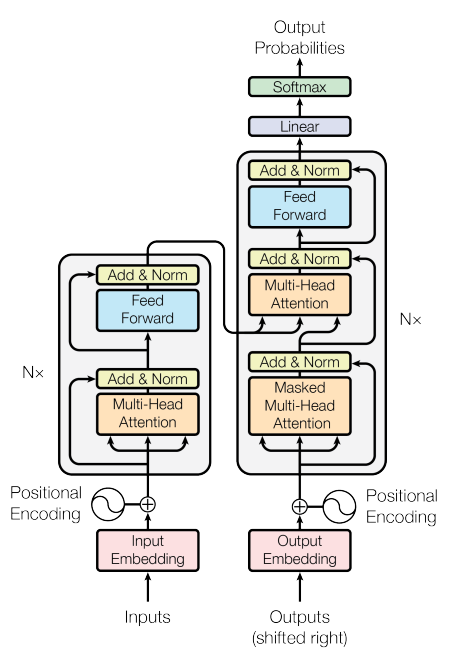

디코더는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 이루어져 있었습니다. 바로 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면 GPT가 되는 것이죠.  
  
GPT를 두 부분으로 나누어서 좀 더 자세히 보겠습니다.

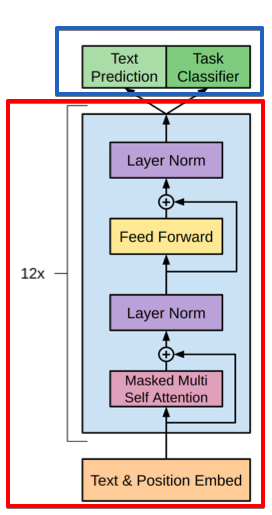

**Transfomer Decoder Block : Pretraining LM (Unspervised Learning)**  
    
첫 번째로 볼 부분은 빨간색 박스 안입니다. pretrain 하는 부분으로 unsupervised learning(비지도 학습)을 하게 됩니다. 위에 트랜스포머의 구조 그대로죠?  
  
** 1. Embedding**
GPT는 텍스트의 Embedding으로 BPE(Byte-pair Encoding)를 사용하고 있어요.  
  
BPE는 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치는 subword tokenization이었죠! 처음 보는 단어일지라도 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 해결할 수 있다는 장점이 있었습니다.  
  
기존 트랜스포머와 마찬가지로 position encoding(포지션 인코딩)도 함께 사용한답니다.  
  
**2. Masked Multi-Head Attention**  
Masked Multi-Head Attention은 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기회귀적(Autoregressive)인 특성을 부여하기 위해 만든 장치입니다. 여기서 자기회귀적이라 함은 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고 그다음 단어를 예측(Next Token Prediction)하게 하는 형태로 학습되는 형태라는 뜻이죠. 이는 마치 sequence-to-sequence 모델에서 디코더가 번역 문장을 생성할 때 time-step을 하나하나 거치듯이 만들어주는 것입니다. 순차처리 방식의 RNN과 달리 정답 문장의 모든 단어를 한꺼번에 입력받는 트랜스포머의 decoder는 학습할 때 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하게 됩니다.  
  
이 구조는 저희가 열심히 공부했던 언어 모델과 같은 구조입니다. 다시 한번 되짚어 보자면, 언어 모델은 비지도 학습을 통해 문장의 자연스러운 순서를 학습하게 됩니다. 그래서 GPT는 문자 생성에 매우 특화되어 있답니다. GPT를 연구한 Open AI도 너무나 자연스러운 문장을 만들어내서 그 악용이 두렵다며 전체 소스 코드를 공개하지 않았을 정도니깐요! 그렇다고 해서 요약, 텍스트 분류 등 다른 task들에서 성능이 떨어지는 것은 아닙니다.  
  
**Text Prediction & Text classification: finetuning downstream task (Supervised Learning)**  
pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 됩니다. 바로 파란색 박스 부분에 해당되는 부분이죠. 여기서 우리는 기존에 봐왔던 모델들과 조금 다른 점을 발견할 수 있습니다. 바로 두 개의 Objective가 존재하는 것이죠.  
  
말 그대로 모델이 두 가지의 문제를 동시에 푸는 겁니다. text prediction과 text classification이 각각 다른 모델들을 이용하여 output을 만들어내는 것이 아니라 한 모델에서 동시에 output을 내는 겁니다.  
  
논문의 저자들은 이렇게 실제 풀어야 하는 문제인 주요 task와 동시에 보조적으로 또 다른 문제를 풀 때(Auxiliary objective) 주요 task에 대한 정확도가 더 올라갔음을 확인했다고 하네요.  
  
생각해 보면 LM 또한, auxiliary로 얻어진 결과라고 생각할 수 있습니다. 시퀀스의 다음 나올 단어들을 학습하다 보니 전체적인 언어의 구조를 알게 된 것이지요.  
  
그렇다면 GPT의 모델 부분을 코드로 한 번 확인해 볼까요? 전체 코드를 한 번에 보면 복잡해 보일 수도 있겠지만, `TFGPT2MainLayer`라는 전체 모델 클래스 안에서 `TFBlock` 레이어 클래스를 반복해서 사용하고 있는 부분을 눈여겨 봐주세요. `TFBlock` 클래스 안에서 `TFAttention`, `TFMLP` 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있습니다.

In [27]:
import tensorflow as tf
from tensorflow import keras
import keras
import keras.utils

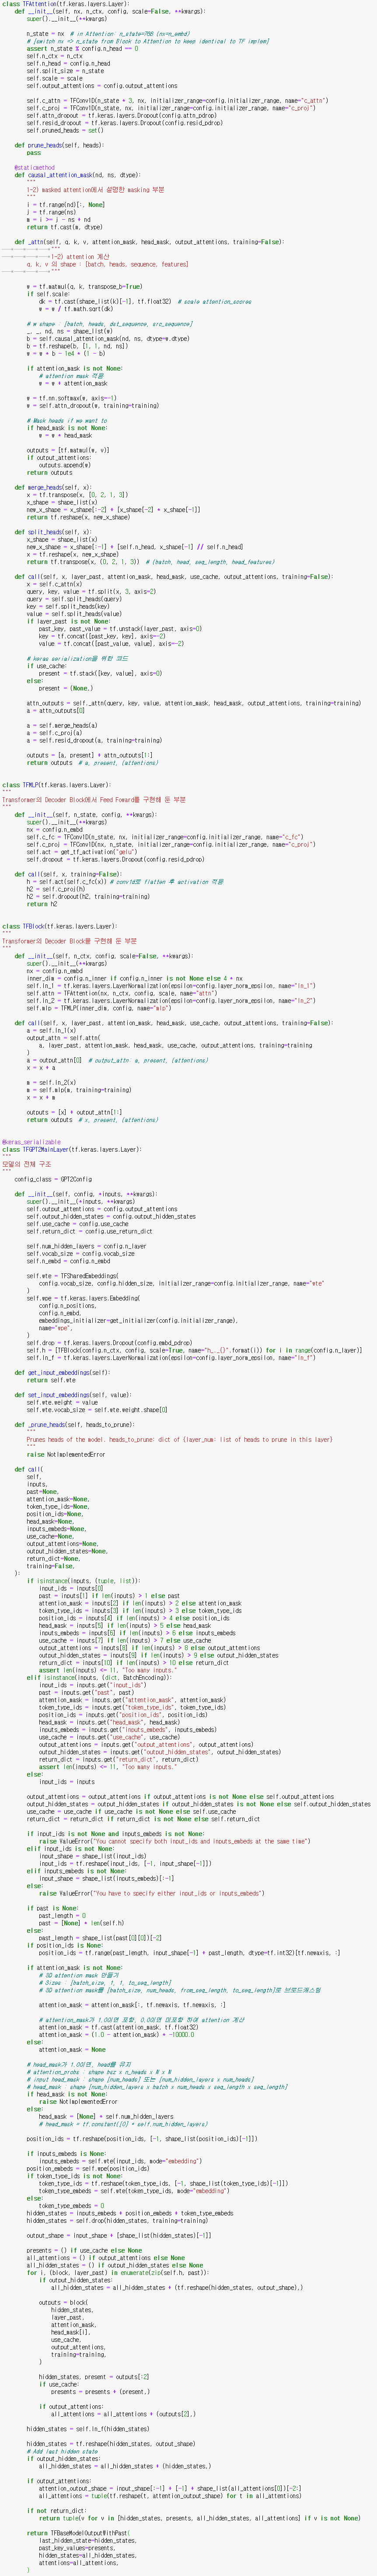

### Input Transformation

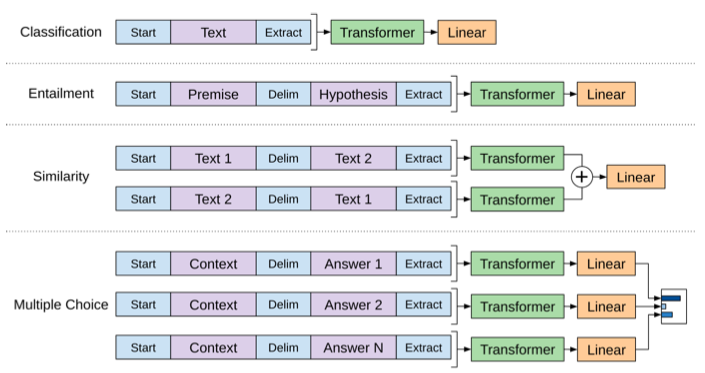

모델이 한 개인데 어떻게 classification, entailment 등등 다양한 문제를 풀 수 있을까요? 바로 input을 변형시켜서 입니다.  
  
GPT는 언어 모델이기 때문에 pretrain시에는 문장(단어의 시퀀스들)을 그대로 input을 줍니다. finetuning 시에도 똑같이 단어의 시퀀스들을 주면 되는데요 이때, input을 아주 조금만 변형시켜 주면 됩니다.  
  
예를 들어 classification task를 풀기 위해 finetuning을 하게 된다면 `<start> <input text> <extract> <class>` 이렇게 구성된 데이터셋을 학습시키면 되는 것이죠. GPT는 이 데이터셋에 맞추어서 weight들을 조정하게 될 것입니다.  
  
finetuning이 끝나고 테스트 시에는 `<start> <input text> <extract>`을 input으로 주면 해당 시퀀스에 뒤이어 나올 토큰 즉 `<class>`를 생성하게 되는 것이죠.

## BERT(Bidirectional Encoder Representations from Transformers)

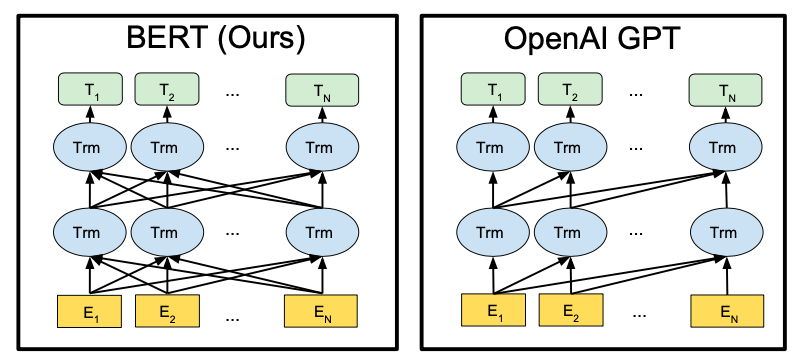

트랜스포머의 decoder를 이용하여 만든 모델인 만큼 GPT는 input을 한 방향으로만(uni-direction) 보게 됩니다. 다음 단어를 예측해야만 하는 LM의 특징이었죠.  
  
이와는 다르게 BERT는 양방향(bi-direction)으로 input을 보고 있는 것을 확인할 수 있습니다. (사실 BERT의 B는 Bi-direction을 의미하고 있습니다.)  
  
그림에서는 보이지 않지만 또 다른 큰 차이점이 존재합니다. BERT는 트랜스포머의 encoder만을 사용한 모델입니다.

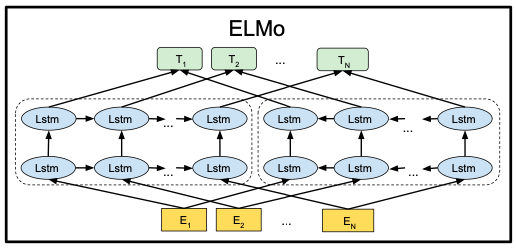

다음은 ELMo와의 비교입니다.  
  
ELMo가 bidirection LSTM을 사용하긴 했지만 독립적인 모델처럼 학습하고 마지막 layer에서만 합쳐준다는 것을 잊지 않으셨죠?!  
  
따라서 ELMo는 가장 위에 layer만 양방향 정보를 가지고 있습니다. 이는 모든 layer들이 양방향으로 보는 BERT와 가장 큰 차이점이라고 할 수 있죠.  
  
  BERT는 이처럼 진짜 bi-direction이 뭔지 보여주기 위해 만들어진 모델이랍니다. 이제 BERT의 핵심 아이디어를 알았으니 더 자세하게 알아볼까요?

### BERT의 구조
**1. Transformer Encoder Block**  

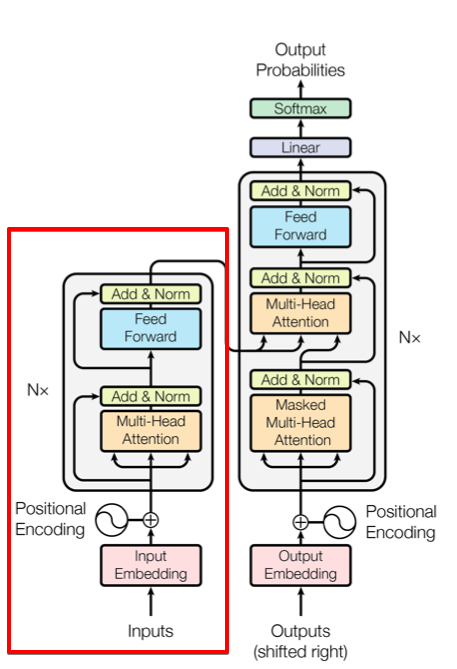

BERT는 기존의 트랜스포머와는 유사하지만 다른 임베딩 체계를 가지고 있습니다. 세 가지 임베딩을 가지고 있는데요. 하나하나 살펴보겠습니다.  
* **Token Embedding**  
  우선 Wordpiece을 이용하여 3만 개의 vocabulary를 학습합니다. 학습한 Wordpiece model을 이용하여 token들을 임베딩해줍니다.  
  
  
* **Segment Embedding**  
  BERT는 두 가지 sentence(BERT의 논문에서 나오는 sentence는 문장의 의미보다는 텍스트 덩어리의 의미입니다.)를 입력으로 받기 때문에 이 두 가지 sentence를 구분해야 할 필요가 있습니다. segment embedding은 바로 이를 위해서 존재하는데요. 모델 입장에서 주르륵 이어진 텍스트들의 덩어리를 나누어주는 역할을 합니다. 그림에서도 `[SEP]`토큰으로 구분된 두 sentence에서 앞부분은 A, 뒷부분은 B로 나누어 임베딩하는 것을 확인하실 수 있습니다.  
  
  
* **Position Embedding**  
    마지막으로 position embedding입니다. 두 sentence를 나누는 것은 segment embedding에서 해주지만, sentence 안에서의 순서는 아직 모르는 상태입니다. 따라서 문장 내에 절대적인 위치(순서)를 알려주기 위해 필요한 것이 position embedding입니다.    
    
    position encoding과 position embedding 어떤 말이 맞는 것일까요? 트랜스포머와 GPT에서는 position encoding이라고 했는데... 똑같은 것 아닐까요?    
    
    혼용하여 사용하긴 하지만 엄밀하게 말하면 다른 개념입니다. encoding은 one-hot-encoding(원핫 인코딩)처럼 미리 정해진 값을 주는 것이지만 embedding은 그 값이 정해진 것이 아니라 학습을 통해 습득하는 것을 의미합니다.  
    
    다시 말해서, BERT는 학습을 통해 position 정보를 습득한다고 생각하시면 됩니다.

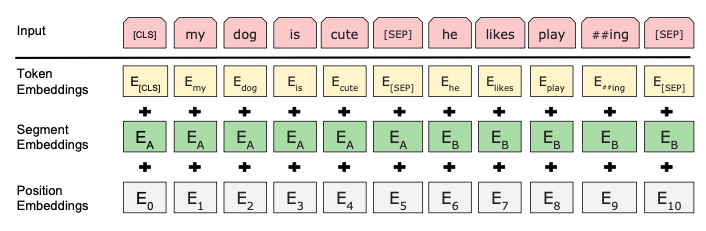

이렇게 얻은 세 가지 임베딩을 모두 합산해 주면 BERT의 임베딩이 완성됩니다. 이후 layer normalization과 dropout까지 해주면 트랜스포머 첫 블록의 입력이 완성됩니다.  
  
`[SEP]`토큰은 위에서 아주 넌-지시 말하고 넘어갔죠. 이것들은 special token이라고 해서 실제 단어에는 쓰이지 않지만 특별한 역할들을 가지고 있는 아이들이에요. sequence-to-sequence 모델에서도 슬-쩍 본 적이 있으실 거예요! 문장의 시작과 끝을 알려주기 위해 쓰였던 `<BOS>`,`<EOS>` 같은 토큰들 말이에요!
  
BERT에는 어떤 토큰들이 어떻게 쓰였나 알아보고 가실까요?
* `[CLS]` : sentence의 시작을 알리는 토큰
* `[SEP]` : sentence의 종결을 알리는 토큰, sentence를 구분하는 데에 사용하기도 함
* `[MASK]`: 마스크 토큰
* `[PAD]` : 배치 데이터의 길이를 맞춰주기 위한 토큰

**2. Activation Function(활성화 함수) : GELU**  
Feedforward Networks에서 BERT는 ReLU대신 GELU를 사용합니다. 음수 값은 0이 되어버리는 ReLU와는 달리 GELU는 음수에서도 완만한 곡선을 그리며 미분을 가능하게 합니다. GELU를 사용하면 성능이 더욱 좋아지기 때문에 BERT의 저자들은 GELU를 사용했다고 합니다.

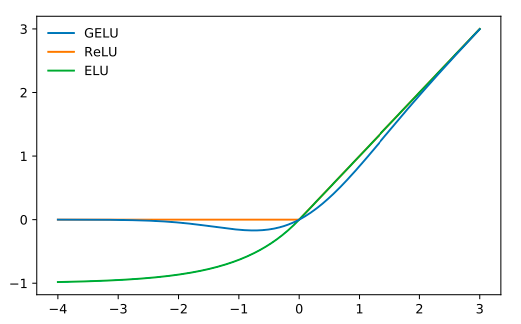

### BERT의 학습
------------
BERT는 양방향(Bi-direction)을 강조한 모델입니다. BERT는 그럼 어떻게 학습을 하는 것일까요? 두 가지 핵심 아이디어를 들여다보죠.

**1) Masked LM(MLM)**  
다음 단어를 예측해야만 하는 일반적인 LM은 그 task의 특성상 한 방향(uni-direction)일 수밖에 없습니다. 이와 달리, BERT는 마스크 된 토큰(`[MASK]`)만 맞추면 되는 masked LM(MLM)을 제안했습니다. 즉, input sequence의 순서에 상관없이 전체 문장을 모두 볼 수 있게 되는 거죠.  
  
MLM을 위해서 BERT는 학습 데이터의 전체에서 15% 를 `[MASK]` 토큰으로 랜덤하게 바꿉니다. 여기서 재미있게도 15%에 해당하는 모든 토큰들을 마스크하는 것이 아니라 80%는 `[MASK]`토큰, 10%는 무작위로 랜덤한 토큰으로 바꿔줍니다. 나머지 10%는 원래의 토큰을 그대로 사용하구요.  
  
그 이유는 바로 finetuning에 있는데요. pretrain을 끝낸 모델을 finetuning할 때에는 input에 [MASK]토큰이 등장하지 않기 때문입니다. 아무래도 finetuning시에 [MASK]토큰이 보이지 않는다면, 당연히 성능에 영향을 미치게 될 것이라고 생각한 거죠. 따라서, [MASK]토큰이 아닌 것들도 예측을 하도록 학습하여 문장 자체에 대한 전반적인 이해(문맥에 대한 이해)를 할 수 있도록 해주는 겁니다.  
  
다시 정리하자면, 전체 학습 데이터의 토큰들 중 12%(15% 중에서 80%)는 [MASK]토큰으로, 1.5%(15% 중에서 10%)는 무작위로 랜덤한 토큰으로 대체하고, 1.5%((15% 중에서 10%)는 변경하지 않고 원래의 토큰을 사용하는 겁니다.

**2) Next Sentence Prediction (NSP)**  
BERT는 마스크 된 토큰을 맞추는 것과 동시에 또 다른 task를 함께 학습합니다. 바로 Next Sentence Prediction (NSP), 다음 문장인지 확인하기 입니다.

예시를 한 번 들어볼까요?

> *여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나*
>
>*그 사람이 바다의 뚜껑 닫지 않고 돌아가*
>
>*그때부터 바다의 뚜껑 열린 채 그대로 있네*
>
>*-하라 마스미 「바다의 뚜껑」 중*

한 행을 하나의 sentence라고 가정해 봅시다. 그렇다면 *'여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나'* 다음의 sentence는 *'그 사람이 바다의 뚜껑 닫지 않고 돌아가'*가 될 것입니다.  
BERT는 이처럼 두 sentence가 연속해서 오는지의 여부를 학습하게 됩니다. 바로 아래와 같이 말이죠.  
  
`[CLS]`여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나  
`[SEP]` 그 사람이 바다의 뚜껑 닫지 않고 돌아가  
`[SEP]`→ TRUE(IsNext)  
  
`[CLS]`여름의 마지막 해수욕 누가 제일 늦게 바다에서 나왔나  
`[SEP]` 한강에서 자전거 타며 아이스 아메리카노를 마시고 싶다  
`[SEP]` → FALSE(NotNext)  
  
NSP를 위해서 BERT의 학습 데이터는 1건당 두 개의 문장으로 구성합니다. 50%의 확률로 TRUE와 FALSE를 부여하도록 만들죠.  
  
또한, task가 너무 쉬워지는 것을 방지하기 위해 max_num_tokens라는 것을 정의합니다. 데이터의 90%는 max_num_tokens가 max_sequence_length가 같도록 만들고, 나머지 10%의 데이터는 max_num_tokens가 max_sequence_length보다 짧게 되도록 랜덤으로 정합니다.  
  
이후, 두 개의 sentence의 단어 총수가 max_num_tokens보다 작아질 때까지 두 sentence 중 단어 수가 많은 쪽의 문장 맨 앞 또는 맨 뒤 단어를 하나씩 제거합니다. 이때 문장 맨 앞의 단어를 선택할지 맨 뒤의 단어의 선택할지는 50%의 확률로 정합니다.  
  
이렇게 NSP를 학습하게 되면, 문장과 문장 사이의 관계를 학습할 수 있게 됩니다. 문장의 길이를 임의적으로 조정하면서, 짧은 문장에 대해서도 성능이 크게 떨어지지 않게 되며, 문장의 단어들을 랜덤하게 삭제하는 과정에서 문장에서 일부 단어들이 없어져도 그 영향을 크게 받지 않게 됩니다.  
  
지금까지 보신 MLM과 NSP는 따로 학습되는 것이 아니라 동시에 이뤄집니다. 따라서 실제 BERT의 학습 데이터셋은 아래와 같은 구조일 것입니다.(편의상 토큰을 띄어쓰기 단위로 나누겠습니다)  
  
`[CLS]`여름의 마지막 `[MASK]` 누가 제일 늦게 `[MASK]` 나왔나  
`[SEP]` 그 사람이 바다의 `[MASK]` 닫지 않고 돌아가`[SEP]` → Label : TRUE(IsNext)  
  
`[CLS]`여름의 `[MASK]` 해수욕 누가 제일 늦게 바다에서 나왔나  
`[SEP]` 한강에서 `[MASK]` 아이스 아메리카노를 마시고 싶다`[SEP]` → Label : FALSE(NotNext)

### 3. Fine-tuning Task
BERT 또한 한 모델이 다양한 task들을 수행하기 때문에 input transformation을 이용합니다.

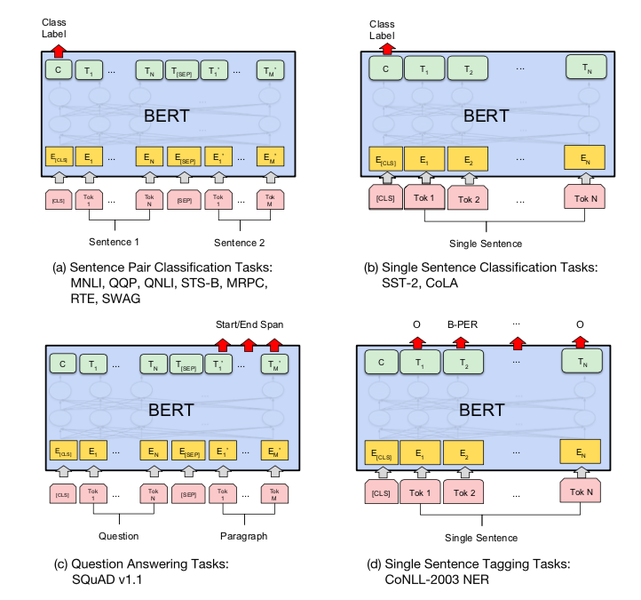

classification 같은 경우는 `[CLS]`토큰을, QA와 같이 문장이나 단어들이 나와야 하는 경우에는 토큰들의 벡터를 output layer에 넣어 output을 산출해냅니다.

이후의 볼 모델들은 트랜스포머가 베이스인 모델의 한계점을 어떻게 극복해나가는가에 초점이 있습니다. 성능이 잘 나오긴 하지만 사실 GPT, BERT와 같은 모델들은 어마어마한 학습 시간과 컴퓨팅 파워가 있어야 가능한 모델들이랍니다.

## Transformer-XL(Transformer Extra Long)
transformer-XL은 기존의 언어 모델과 트랜스포머가 가지고 있던 한계점을 개선한 모델입니다. 트랜스포머 이전의 LM에서도 늘 한계점으로 꼽히던 context를 반영하기가 트랜스포머에서도 문제로 떠오릅니다.  
비교적 짧은 문장에서의 context는 잘 학습했는데, sequence가 길어질수록 그 상관관계(long-term dependency)가 점점 떨어진다는 것이 문제였죠. 주제에 대해서 잘 말하다가 갑자기 다른 이야기를 한다던가 하는 문제 말이에요.  
  
transformer-XL은 직관적인 그 이름에서도 드러나듯이 좀 더 긴 context를 어떻게 담을 것인가에 대해 고민한 모델입니다.  
어떻게 해서 transformer-XL은 context를 이어나갈까요?

### transformer-XL의 구조

transformer-XL을 알아보기에 앞서 트랜스포머를 좀 더 자세히 보죠.  
이번에 조금 다른 측면에서 접근해 보겠습니다. context를 중점적으로 볼 거예요.  
  
**1. Vanilla Transformer LMs**  
트랜스포머는 max_seq_length가 정해져 있습니다. 즉, 모델이 감당할 수 있을 만큼 텍스트를 잘라서 학습하고, 학습한 이후부터 다시 일정 길이만큼 잘라서 학습을 하게 되죠. 이때, 이전 segment에서 학습했던 context는 무시되고, 지금 학습을 하고 있는 segment 안에서만 context를 고려하게 됩니다. 다시 말해서 segment1과 segment2는 전혀 공유하는 context가 없이 단절되었다(context fragmentation)는 말입니다. 분명 사람이 볼 때는 이어지는 흐름인데 말이죠.  


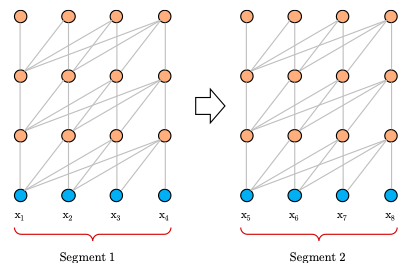

테스트 시 또 다른 문제가 등장하게 되죠. 바로 슬라이딩을 하면서 생기는 문제입니다. 모델은 일정 길이의 context를 보고 한 단어를 예측합니다. 그다음에 딱 한 개만큼만 슬라이딩하여 새로운 context를 만들고 다시 연산하여 하나의 단어를 예측합니다.  
이렇게 하면 이전 context를 조금씩이나마 유지할 수 있을지 모르지만 연산에 드는 비용이 엄청나겠죠?

**2. Segment-level recurrence with state reuse**  
이러한 문제들을 해결하기 위해 저자들은 recurrence 메커니즘을 도입합니다. 학습 시에 이전 segment에서 계산했었던 hidden state를 사용하는 것이죠. 이를 통해 context fragmentation을 해결하고 long-term dependency를 유지할 수 있게 됩니다.  
  
RNN의 원리를 떠올리면 쉽게 와닿으실 겁니다. 그러나 RNN과는 달리, transformer-XL은 다음 layer에서 이전 layer의 hidden state를 재사용하게 됩니다.

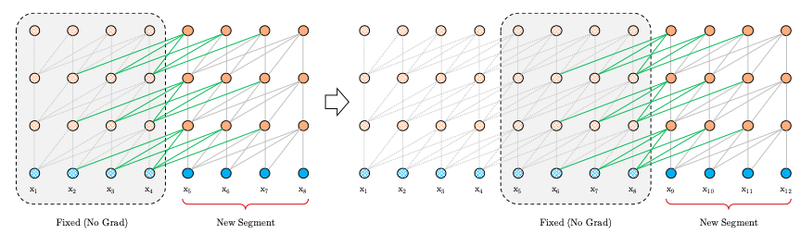

단, 이때 이전 segment들의 정보를 가진 hidden state들의 gradient는 더 이상 변하지 않도록 고정을 시킵니다.(메모리에 있던 값을 불러온다고 하여 cache라고 부르기도 합니다)

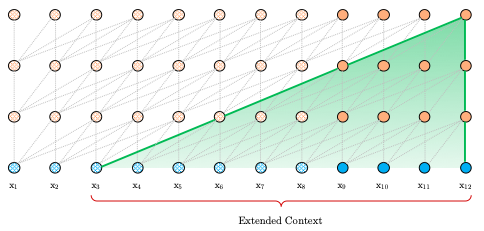

트랜스포머 구조의 LM이 테스트 시 가지고 있던 문제도 recurrence 메커니즘을 이용하면 쉽게 해결할 수 있습니다. 이미 계산한 hidden state의 정보를 메모리에 가지고 있다가 cache를 하기 때문에 계속해서 반복하여 똑같은 연산을 할 필요가 없어집니다. 이 덕분에 속도도 더욱 빨라질 수 있습니다.

**3. Relative Positional Encodings**  
트랜스포머에 segment-level의 recurrence 메커니즘을 적용하면 한 가지 문제가 발생합니다. 바로 포지션 정보를 어떻게 추가할 것인가에 대한 문제이죠.  
  
기존 트랜스포머의 포지션 인코딩은 각 segment 내에서의 절대적인 위치 정보를 인코딩하게 됩니다.

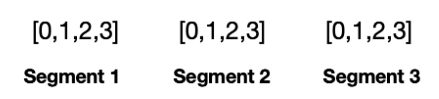

그러나 recurrence 메커니즘을 사용하게 되면 segment들 사이에서의 상대적인 위치 정보가 필요합니다. 이를 위해 저자들은 상대적인 포지션 인코딩(Relative Positional Encodings) 방법을 제안합니다.  
수식 때문에 조금 복잡해 보일 수도 있지만, 기억하실 것은 상대적인 정보를 임베딩 레이어가 아닌 attention 연산 시에 주입한다는 것입니다.

**트랜스포머의 attention 연산**

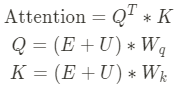

트랜스포머의 attention 연산을 수식으로 나타내면 위와 같습니다. 여기서 EE는 토큰 임베딩, UU는 포지션 인코딩을 의미하죠. attention 연산에 QQ와 KK를 대입하면 아래와 같은 식이 나타납니다.

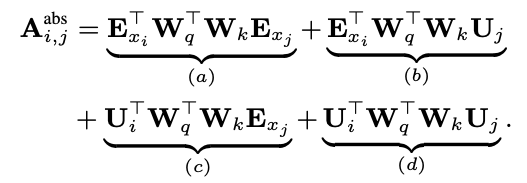

U에 인코딩된 i, ji,j번째 포지션의 정보를 가지고 연산을 하는 모양새입니다.  
  
그러나 위에서 언급했듯이 이제는 상대적인 위치 정보가 필요합니다. $i = 1, j = 2$이든 $i=7, j=8$이든 상관 없이 $j$가 $i$보다 1 뒤에 있다는 것만 알면 되는 것이죠.

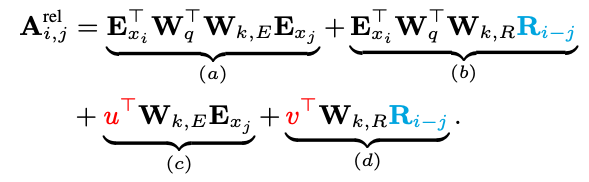

이를 위해 $U$ 대신 $R$을 사용합니다. $R$은 상대적인 포지션 정보를 encoding한 매트릭스입니다. $R$의 $i$번째 행은 $i$와 다은 단어들 간의 상대적인 포지션을 알려주죠. 따라서, 아래 첨자 $i-j$에서 보이듯이 $i$와 $j$의 상대적인 거리를 이용하고 있습니다. 여기서 $R$은 기존의 트랜스포머와 마찬가지로 학습되는 것이 아닌 sinusoid encoding matrix를 사용합니다.  
  
또한 학습 가능한 파라미터로 벡터$u$와 $v$가 추가되었습니다. 기존 트랜스포머는 query의 위치에 따라 그 query vector가 영향을 받았습니다. 그러나 절대적인 포지션이 아닌 상대적인 포지션 정보를 이용하게 되면서 query는 그 위치에 상관없이 똑같은 query vector를 사용하게 됩니다. 따라서 포지션에 상관없이 같은 값인 벡터 uu와 vv로 대신하게 되었습니다.  
  
마지막으로, content-based key vectors와 location-based key vectors를 독립적으로 만들기 위해 $W_{k,E}$와$W_{k,R}$를 분리했습니다.  
  
이렇게 recurrence 메커니즘과 relative position encoding을 통해 transformer-XL은 auxiliary losses 없이도 뛰어난 성능을 낼 수 있었다고 말합니다.

## ALBERT(A Lite BERT for Self-supervised Learning of Language Representations)

BERT와 같은 pretrain 모델들이 이제 NLP의 대세라는 것은 잘 알았습니다. 그러나 이런 모델들은 개인의 장비에서 학습을 시키는 데에 조금 무리가 있습니다.  
  
ALBERT는 '성능은 유지하면서 메모리는 적게 쓰는 좀 더 가벼운 BERT를 만들 수 없을까?'라는 질문에서부터 출발합니다.

### ALBERT의 구조
ALBERT의 기본 구조는 BERT를 따릅니다. 트랜스포머의 encoder를 기반으로 하며, activation function(활성화 함수)으로는 GELU를 사용하고 있죠.  
  
더 가벼운 BERT를 만들기 위해 ALBERT는 아래의 세 가지 아이디어를 적용합니다.

**1. Factorized embedding parameterization**  
  
BERT는 input의 token embedding(E)과 hidden layer(H)의 size가 같습니다.(E≡H) ALBERT는 E를 H보다 작게 만들어서 parameter의 수를 줄입니다.  
  
그 이유가 무엇일까요? 왜 토큰 임베딩 사이즈(E)를 줄일까요? 저자는 BERT와 같은 모델들의 성공 요인 중 하나를 context를 반영한 임베딩에 있다고 이야기합니다.  
  
모델의 입장에서 context를 반영하는 부분은 트랜스포머 layer(hidden layer)를 통과하는 부분들입니다. token embedding은 context와 무관한, 그저 token을 벡터화한 것에 불과하죠. 따라서, E와 H의 사이즈가 꼭 같을 필요는 없습니다. 오히려 H의 사이즈가 클수록 성능이 높아질 가능성이 있으며, E의 사이즈를 줄여도 성능과는 크게 연관이 없어 보입니다.  
  
그러나, 무작정 E나 H의 사이즈를 변경할 수는 없습니다. BERT에서는 E와 H를 같도록(tying) 모델을 설계했기 때문이죠.  
  
BERT에서의 임베딩 벡터는 V * H(혹은 E)의 매트릭스였습니다. 성능을 위해서라면 V도 너무 작아서는 안 됩니다. 따라서 V도, H(E)도 커지게 되면 엄청난 수의 parameter들을 가지게 됩니다. 이는 parameter를 줄이는 방법이 아니지요.  
  
그렇다면 어떻게 효과적으로 적당한 V를 유지하면서, H는 키우고 E는 줄일 수 있을까요?  
  
정답은 `matrix factorization(행렬 분해)`에 있습니다.  
  
V H의 매트릭스를 V E와 E * H의 매트릭스로 나누는 것입니다. 이런 기법은 추천 시스템 등 다양한 분야에서 널리 쓰이고 있는 기법이기도 합니다. 행렬 분해를 통해 H의 사이즈는 유지한 채 E의 사이즈를 줄일 수 있습니다. 또한, parameter의 수도 줄일 수 있지요.

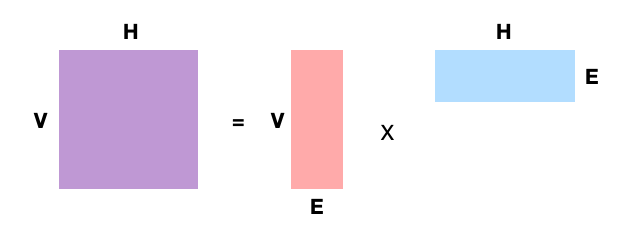

**2. Cross-layer parameter sharing**  
  
parameter를 공유하는 방법은 parameter의 수를 줄이는 방법 중 하나입니다. ALBERT에서도 이 방식을 사용합니다. layer간의 모든 parameter들을 공유하는 것이죠.  

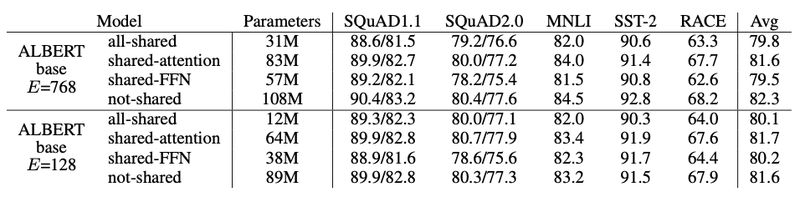

사실 모델이 parameter를 공유한다는 것은 일장일단(trade-off)이 있습니다. 더 많은 부분을 공유할수록 모델의 parameter의 수는 줄어들지만(경량화) 성능이 떨어질 우려가 있죠. 그럼에도 불구하고 ALBERT는 기본적으로 모든 parameter들을 공유하고 있습니다. 마치 RNN이 한 개의 hidden state를 계속 사용하는 것처럼 ALBERT는 transformer block 1개를 이용하여 재사용합니다.

**3. Inter-sentence coherence loss**  
  
BERT는 Masked-LM(MLM) Next Sentence Prediction(NSP)을 이용하여 model을 pre-train시켰습니다.  
  
NSP의 경우 실제 이어지는 두 문장(positive)과, 임의로 뽑은 두 문장(negative)을 구분하는 것을 학습하게 됩니다. 그러나 이렇게 임의로 뽑은 문장은 첫 번째 문장과 두 번째 문장의 topic이 매우 다를 가능성이 있습니다. 다시 말하면, NSP는 두 문장의 연관 관계 보다 두 문장의 topic 차이를 구별하는 것에 가까울 수 있다는 것입니다.  
  
ALBERT는 이런 NSP를 과감하게 삭제하고 이를 Sentence Order Prediction(SOP)로 대체합니다. SOP는 임의로 문장을 샘플링하는 것이 아니라, 실제 두 문장의 순서를 바꾸어 학습 데이터를 만듭니다. 두 문장의 순서가 원래의 데이터의 순서와 일치한다면 positive, 순서가 원래 데이터와 반대로 되어있다면 negative이 되는 것이죠. 이러한 학습을 통해 모델은 기존의 NSP보다 훨씬 더 복잡한 언어적 사이의 연관성(논문에서는 discourse-level coherence properties라는 표현을 사용합니다)을 이해할 수 있게 되는 것입니다.

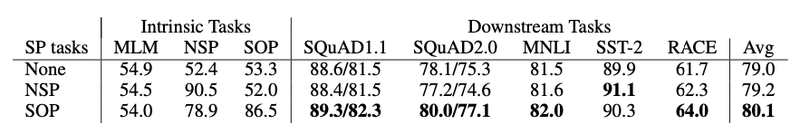  
[NSP와 SOP의 성능 비교]

이러한 구조들을 이용하여 ALBERT-xxlarge는 BERT-large의 약 70%의 parameter들을 가지고도 오히려 성능을 개선할 수 있게 해줍니다. 이 밖에도 논문에서는 '같은 시간은 학습한다면?' 등 다양한 실험들을 통해 여러 시사점을 주고 있습니다.  